In [ ]:
import pandas as pd
import numpy as np

# 모델링 및 평가 라이브러리
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.font_manager as fm
from sklearn.model_selection import GridSearchCV


# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# Find the font path for NanumGothic
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# Set the font to NanumGothic
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # Allow negative signs to be displayed correctly

print("Korean font installed and configured.")

Korean font installed and configured.


In [ ]:
# 데이터 불러오기
df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_1.csv')
display(df_7.shape, df_1.shape)

/tmp/ipython-input-2606453542.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')


(221701, 39)

(32709, 39)

In [ ]:
# 사용할 모델 딕셔너리
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, random_state=42, n_jobs=-1, verbose=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

## 7

In [ ]:
df_7.dtypes

,0
Unnamed: 0,int64
판매일,object
구분,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
옵션코드,object
규격,object
입수,int64
바코드,float64


In [ ]:
# --- 1. Feature Selection ---
df_7.drop(columns=['Unnamed: 0', '구분', '옵션코드', '규격', '상품명', 'holiday_name'], inplace=True)
df_7.dtypes

,0
판매일,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
입수,int64
바코드,float64
대분류,int64
중분류,int64
소분류,int64
공급가액,int64


In [ ]:
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 7
TARGET = '판매수량'

# 모델에 사용할 변수(Feature) 선택
# '판매일'과 같이 모델이 직접 학습할 수 없는 컬럼은 제외
features = [col for col in df_7.columns if col not in ['판매일', '중분류', TARGET]]

# --- 3. 훈련/검증 데이터 분리 (2021~2023년 -> 훈련, 2024년 -> 검증) ---
train_df = df_7[df_7['판매일'] < '2024-01-01']
val_df = df_7[df_7['판매일'] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"훈련 데이터 개수: {len(X_train)}개, 검증 데이터 개수: {len(X_val)}개")

훈련 데이터 개수: 193781개, 검증 데이터 개수: 27920개



--- Random Forest 모델 학습 및 평가 ---
RMSE: 9.85, MAE: 0.99, R-squared: 0.71, Adj. R-squared: 0.71

--- XGBoost 모델 학습 및 평가 ---
RMSE: 13.62, MAE: 1.52, R-squared: 0.44, Adj. R-squared: 0.44

--- LightGBM 모델 학습 및 평가 ---
RMSE: 7.24, MAE: 1.39, R-squared: 0.84, Adj. R-squared: 0.84

--- Gradient Boosting 모델 학습 및 평가 ---
RMSE: 8.56, MAE: 1.69, R-squared: 0.78, Adj. R-squared: 0.78

--- 모델별 최종 성능 비교 ---


,RMSE,MAE,R2,Adj. R2
LightGBM,7.238538,1.390887,0.842209,0.842039
Gradient Boosting,8.564890,1.694782,0.779085,0.778847
Random Forest,9.852287,0.990626,0.707682,0.707367
XGBoost,13.620301,1.522948,0.441330,0.440729


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

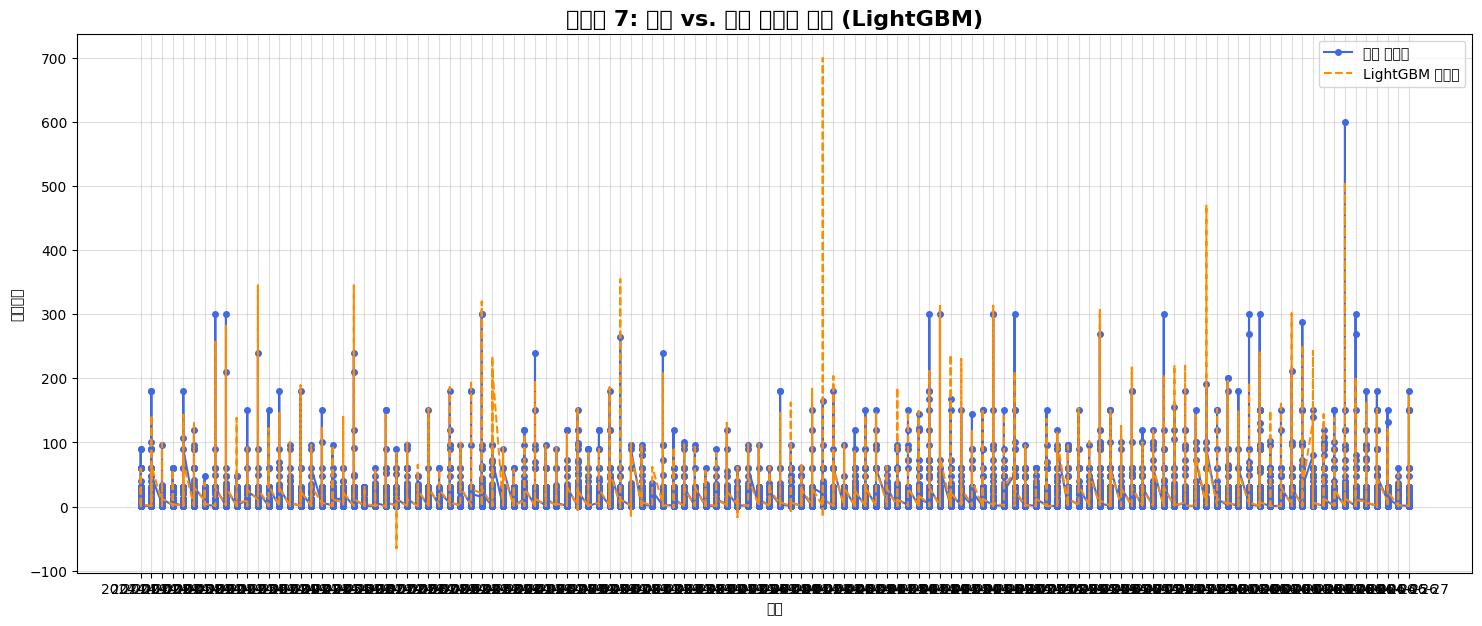

In [ ]:
# --- 4. 모델 학습 및 평가 ---
results = {}
predictions_dict = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} 모델 학습 및 평가 ---")

    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터로 예측
    predictions = model.predict(X_val)
    predictions_dict[model_name] = predictions

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)

    # ✨️ 조정된 R-제곱(Adjusted R-squared) 계산
    n = len(X_val) # 데이터 개수
    p = len(X_val.columns) # 변수(Feature) 개수
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # 결과 저장
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'Adj. R2': adj_r2}
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}, Adj. R-squared: {adj_r2:.2f}")

# --- 5. 최종 결과 비교 ---
results_df = pd.DataFrame(results).T
print("\n--- 모델별 최종 성능 비교 ---")
display(results_df.sort_values(by='RMSE'))

# --- 6. 최적 모델 결과 시각화 ---
# RMSE가 가장 낮았던 모델을 최적 모델로 선택
best_model_name = results_df['RMSE'].idxmin()
best_predictions = predictions_dict[best_model_name]

plt.figure(figsize=(18, 7))
plt.plot(val_df['판매일'], y_val, label='실제 판매량', color='royalblue', marker='o', markersize=4)
plt.plot(val_df['판매일'], best_predictions, label=f'{best_model_name} 예측량', color='darkorange', linestyle='--')

plt.title(f"중분류 {TARGET_CATEGORY}: 실제 vs. 예측 판매량 비교 ({best_model_name})", fontsize=16, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('판매수량')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

1. 모델 선택: LightGBM 🚀
성능 표를 보면 LightGBM이 모든 면에서 가장 뛰어남.

RMSE (7.24): 가장 낮음. 예측 오차의 전반적인 크기가 가장 작다는 의미.

R-제곱 / 조정된 R-제곱 (0.84): 가장 높음. 데이터의 변동성을 약 84%나 설명할 수 있다는 뜻으로, 모델의 설명력이 가장 뛰어남.

MAE (1.39): Random Forest보다는 높지만, RMSE와 R-제곱을 고려했을 때 전반적인 성능은 LightGBM이 월등함. (Random Forest는 평균 오차는 작지만 가끔 큰 실수를 하는 모델일 수 있음.)

In [ ]:
# --- 1. 튜닝할 LightGBM 모델 준비 ---
lgbm = LGBMRegressor(random_state=42, verbose=-1)

# --- 2. 탐색할 하이퍼파라미터 범위 설정 ---
# 이 범위를 조절하며 최적의 값을 찾아나갈 수 있습니다.
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [7, 10, 15],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [31, 40, 50] # max_depth보다 작은 값
}

# --- 3. GridSearchCV 설정 및 학습 ---
# cv=3 -> 데이터를 3개로 나눠서 교차 검증 수행
# scoring='neg_root_mean_squared_error' -> RMSE를 기준으로 최고 성능 모델 선택
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("--- LightGBM 하이퍼파라미터 튜닝 시작 ---")
grid_search.fit(X_train, y_train) # 이 부분은 이미 실행했다고 가정

# --- 4. 튜닝 결과 확인 및 최종 성능 평가 (수정된 부분) ---
# 최적의 모델을 가져옵니다.
best_model = grid_search.best_estimator_

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = best_model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 최적 모델 최종 성능 ---")
print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

--- LightGBM 하이퍼파라미터 튜닝 시작 ---
Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- 튜닝된 최적 모델 최종 성능 ---
최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}
RMSE: 6.6793
MAE: 1.3277
R-squared: 0.8656
Adjusted R-squared: 0.8655


In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib'

# joblib.dump() 함수를 사용해 모델을 파일로 저장합니다.
joblib.dump(best_model, filename)

print(f"모델이 '{filename}' 파일로 저장되었습니다.")


# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
# loaded_model = joblib.load(filename)

#print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# new_data = np.random.rand(5, 10)
# predictions = loaded_model.predict(new_data)

# print("\n불러온 모델로 새로운 데이터에 대한 예측 수행:")
# print(predictions)

모델이 '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib' 파일로 저장되었습니다.


In [ ]:
from sklearn.ensemble import VotingRegressor

# --- 1. 앙상블에 사용할 개별 모델 정의 ---
# 위 튜닝에서 찾은 최적의 파라미터나, 기본 성능이 좋았던 파라미터를 사용합니다.
rfr = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
lgbm = best_model

# --- 2. VotingRegressor 설정 ---
# ('모델별명', 모델객체) 형태로 리스트를 만듭니다.
ensemble_model = VotingRegressor(
    estimators=[
        ('LightGBM', lgbm),
        ('Gradient Boosting', gbr),
        ('Random Forest', rfr)
    ]
)

# --- 3. 앙상블 모델 학습 및 평가 ---
print("\n--- 앙상블 모델 학습 및 평가 ---")
ensemble_model.fit(X_train, y_train)

# 예측 및 성능 평가 (수정된 부분)
ensemble_predictions = ensemble_model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
ens_rmse = np.sqrt(mean_squared_error(y_val, ensemble_predictions))
ens_mae = mean_absolute_error(y_val, ensemble_predictions)
ens_r2 = r2_score(y_val, ensemble_predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
ens_adj_r2 = 1 - (1 - ens_r2) * (n - 1) / (n - p - 1)

print("\n--- 앙상블 모델 최종 성능 ---")
print(f"RMSE: {ens_rmse:.4f}")
print(f"MAE: {ens_mae:.4f}")
print(f"R-squared: {ens_r2:.4f}")
print(f"Adjusted R-squared: {ens_adj_r2:.4f}")


--- 앙상블 모델 학습 및 평가 ---

--- 앙상블 모델 최종 성능 ---
RMSE: 7.0271
MAE: 1.2409
R-squared: 0.8513
Adjusted R-squared: 0.8511


오히려 단일 모델이 더 나음

In [ ]:
# Optuna로 최적 모델 찾아보기
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import warnings

# Optuna의 로그 출력을 간소화
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore', category=UserWarning)


# --- 1. Optuna 목적 함수(Objective Function) 정의 ---
# 이 함수는 RFE 루프 안에서 매번 호출됩니다.
def objective(trial, X_train, y_train):
    # 탐색할 하이퍼파라미터 범위 지정
    params = {
        'objective': 'regression_l1', # MAE를 손실 함수로 사용
        'metric': 'rmse',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # 교차 검증을 통해 안정적인 성능 측정
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = LGBMRegressor(**params, verbose=-1)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, preds))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)


# --- 2. 재귀적 변수 제거(RFE) 루프 실행 ---
# 사용할 모든 변수(Feature) 리스트로 시작
remaining_features = list(X_train.columns)
rfe_results = []

print("--- 재귀적 변수 제거(RFE) 시작 ---")

while len(remaining_features) > 0:
    print(f"\n현재 변수 개수: {len(remaining_features)}")

    # 2-1. 현재 변수들로 Optuna 튜닝 실행
    current_X_train = X_train[remaining_features]

    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, current_X_train, y_train), n_trials=30) # n_trials 조절 가능

    # 2-2. 최적 파라미터로 모델 재학습 및 성능 평가
    best_params = study.best_params
    model = LGBMRegressor(**best_params, random_state=42, verbose=-1)
    model.fit(current_X_train, y_train)

    # 검증 데이터셋으로 최종 성능 평가
    current_X_val = X_val[remaining_features]
    predictions = model.predict(current_X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    r2 = r2_score(y_val, predictions)

    # 결과 저장
    rfe_results.append({
        'num_features': len(remaining_features),
        'features': remaining_features.copy(),
        'rmse': rmse,
        'r2': r2,
        'best_params': best_params
    })

    print(f"검증 RMSE: {rmse:.4f}, R-squared: {r2:.4f}")

    # 2-3. 가장 중요도가 낮은 변수 찾아서 제거
    feature_importances = pd.Series(model.feature_importances_, index=remaining_features)
    least_important_feature = feature_importances.idxmin()
    remaining_features.remove(least_important_feature)

    print(f"제거된 변수: {least_important_feature}")


# --- 3. 최종 결과 분석 ---
results_df = pd.DataFrame(rfe_results)
best_result = results_df.loc[results_df['rmse'].idxmin()]

print("\n\n--- RFE 최종 결과 ---")
print(f"최적의 변수 개수: {best_result['num_features']}")
print(f"최고 성능 (RMSE): {best_result['rmse']:.4f}")
print(f"최고 성능 (R-squared): {best_result['r2']:.4f}")
print("\n최적의 변수 조합:")
print(best_result['features'])
print("\n최적의 하이퍼파라미터:")
print(best_result['best_params'])

# 성능 변화 시각화
plt.figure(figsize=(12, 6))
plt.plot(results_df['num_features'], results_df['rmse'], marker='o')
plt.title('변수 개수에 따른 모델 성능(RMSE) 변화', fontsize=15)
plt.xlabel('사용된 변수(Feature) 개수')
plt.ylabel('검증 데이터 RMSE')
plt.grid(True)
plt.gca().invert_xaxis() # x축 순서를 거꾸로 (변수가 많을수록 왼쪽)
plt.show()

--- 재귀적 변수 제거(RFE) 시작 ---

현재 변수 개수: 30
검증 RMSE: 7.4760, R-squared: 0.8317
제거된 변수: 대분류

현재 변수 개수: 29
검증 RMSE: 8.3315, R-squared: 0.7910
제거된 변수: 소분류

현재 변수 개수: 28


[W 2025-10-09 12:04:24,791] Trial 4 failed with parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.012805189118881044, 'num_leaves': 69, 'feature_fraction': 0.9899635436470658, 'bagging_fraction': 0.7876625514071695, 'bagging_freq': 2, 'min_child_samples': 85} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipython-input-493258240.py", line 63, in <lambda>
    study.optimize(lambda trial: objective(trial, current_X_train, y_train), n_trials=30) # n_trials 조절 가능
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-493258240.py", line 41, in objective
    model.fit(X_train_fold, y_train_fold)
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py", line 1398, in fit
    super().fit(
  File 

KeyboardInterrupt: 

## 1

In [ ]:
df_1.dtypes

,0
Unnamed: 0,int64
판매일,object
구분,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
옵션코드,object
규격,object
입수,int64
바코드,float64


In [ ]:
# --- 1. Feature Selection ---
df_1.drop(columns=['Unnamed: 0', '구분', '옵션코드', '규격', '상품명', 'holiday_name'], inplace=True)
df_1.dtypes

,0
판매일,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
입수,int64
바코드,float64
대분류,int64
중분류,int64
소분류,int64
공급가액,int64


In [ ]:
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 1
TARGET = '판매수량'

# 모델에 사용할 변수(Feature) 선택
# '판매일'과 같이 모델이 직접 학습할 수 없는 컬럼은 제외
features = [col for col in df_1.columns if col not in ['판매일', '중분류', TARGET]]

# --- 3. 훈련/검증 데이터 분리 (2021~2023년 -> 훈련, 2024년 -> 검증) ---
train_df = df_1[df_1['판매일'] < '2024-01-01']
val_df = df_1[df_1['판매일'] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"훈련 데이터 개수: {len(X_train)}개, 검증 데이터 개수: {len(X_val)}개")

훈련 데이터 개수: 26512개, 검증 데이터 개수: 6197개



--- Random Forest 모델 학습 및 평가 ---
RMSE: 3.76, MAE: 1.01, R-squared: 0.64, Adj. R-squared: 0.64

--- XGBoost 모델 학습 및 평가 ---
RMSE: 4.28, MAE: 1.12, R-squared: 0.53, Adj. R-squared: 0.53

--- LightGBM 모델 학습 및 평가 ---
RMSE: 3.84, MAE: 0.94, R-squared: 0.62, Adj. R-squared: 0.62

--- Gradient Boosting 모델 학습 및 평가 ---
RMSE: 4.18, MAE: 1.24, R-squared: 0.55, Adj. R-squared: 0.55

--- 모델별 최종 성능 비교 ---


,RMSE,MAE,R2,Adj. R2
Random Forest,3.764634,1.009498,0.637745,0.635982
LightGBM,3.842353,0.940197,0.622633,0.620797
Gradient Boosting,4.182611,1.241044,0.552839,0.550663
XGBoost,4.281738,1.115857,0.531392,0.529112


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

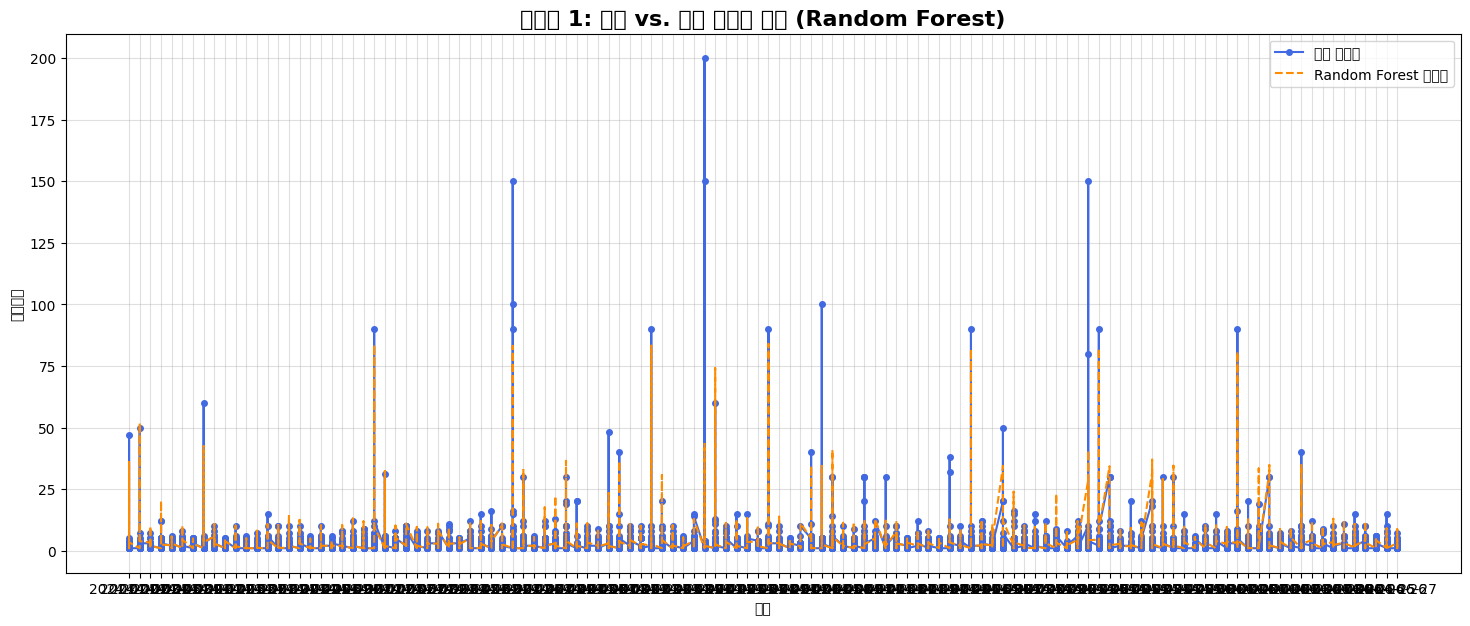

In [ ]:
# --- 4. 모델 학습 및 평가 ---
results = {}
predictions_dict = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} 모델 학습 및 평가 ---")

    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터로 예측
    predictions = model.predict(X_val)
    predictions_dict[model_name] = predictions

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)

    # ✨️ 조정된 R-제곱(Adjusted R-squared) 계산
    n = len(X_val) # 데이터 개수
    p = len(X_val.columns) # 변수(Feature) 개수
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # 결과 저장
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'Adj. R2': adj_r2}
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}, Adj. R-squared: {adj_r2:.2f}")

# --- 5. 최종 결과 비교 ---
results_df = pd.DataFrame(results).T
print("\n--- 모델별 최종 성능 비교 ---")
display(results_df.sort_values(by='RMSE'))

# --- 6. 최적 모델 결과 시각화 ---
# RMSE가 가장 낮았던 모델을 최적 모델로 선택
best_model_name = results_df['RMSE'].idxmin()
best_predictions = predictions_dict[best_model_name]

plt.figure(figsize=(18, 7))
plt.plot(val_df['판매일'], y_val, label='실제 판매량', color='royalblue', marker='o', markersize=4)
plt.plot(val_df['판매일'], best_predictions, label=f'{best_model_name} 예측량', color='darkorange', linestyle='--')

plt.title(f"중분류 {TARGET_CATEGORY}: 실제 vs. 예측 판매량 비교 ({best_model_name})", fontsize=16, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('판매수량')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

랜포가 제일 좋음

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- 1. 튜닝할 Random Forest 모델 준비 ---
# random_state와 n_jobs는 고정해둡니다.
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- 2. 탐색할 하이퍼파라미터 범위 설정 ---
# 테스트해볼 파라미터 값들의 조합입니다.
# 너무 많은 조합은 시간이 오래 걸리므로, 처음에는 범위를 좁게 시작하는 것이 좋습니다.
param_grid = {
    'n_estimators': [100, 200],         # 트리의 개수
    'max_depth': [15, 20, None],       # 트리의 최대 깊이
    'min_samples_split': [5, 10],      # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [3, 5]         # 리프 노드가 되기 위한 최소 샘플 수
}

# --- 3. GridSearchCV 설정 및 학습 ---
# cv=3: 데이터를 3개로 나눠 교차 검증을 수행합니다.
# scoring='neg_root_mean_squared_error': RMSE를 기준으로 최고 성능 모델을 선택합니다.
grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2 # 튜닝 과정을 화면에 출력
)

print("--- Random Forest 하이퍼파라미터 튜닝 시작 ---")
# '신선식품'의 훈련 데이터(X_train, y_train)로 튜닝을 시작합니다.
grid_search.fit(X_train, y_train)


# --- 4. 튜닝 결과 확인 및 최종 성능 평가 ---
print("\n--- 튜닝 결과 ---")
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델을 가져옵니다.
best_rf_model = grid_search.best_estimator_

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = best_rf_model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 Random Forest 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

--- Random Forest 하이퍼파라미터 튜닝 시작 ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits

--- 튜닝 결과 ---
최적 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}

--- 튜닝된 Random Forest 모델 최종 성능 ---
RMSE: 3.8051
MAE: 1.0086
R-squared: 0.6299
Adjusted R-squared: 0.6281


In [ ]:
# 재튜닝

# --- 1. 튜닝할 Random Forest 모델 준비 ---
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- 2. 수정된 하이퍼파라미터 탐색 범위 ---
param_grid_revised = {
    'n_estimators': [200, 300, 400],      # 트리의 개수 확장
    'max_depth': [10, 15, 20],            # 기존 값 주변 탐색
    'min_samples_split': [2, 5, 8],      # 더 작은 값 포함하여 세분화
    'min_samples_leaf': [1, 3, 5]        # 더 작은 값 포함하여 세분화
}

# --- 3. GridSearchCV 설정 및 학습 ---
grid_search_revised = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid_revised,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

print("--- Random Forest 재튜닝 시작 ---")
grid_search_revised.fit(X_train, y_train)

# --- 4. 튜닝 결과 확인 및 최종 성능 평가 ---
print("\n--- 재튜닝 결과 ---")
print("최적 하이퍼파라미터:", grid_search_revised.best_params_)

best_rf_model_revised = grid_search_revised.best_estimator_
predictions_revised = best_rf_model_revised.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 Random Forest 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

--- Random Forest 재튜닝 시작 ---
Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- 재튜닝 결과 ---
최적 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}

--- 튜닝된 Random Forest 모델 최종 성능 ---
RMSE: 3.8051
MAE: 1.0086
R-squared: 0.6299
Adjusted R-squared: 0.6281


In [ ]:
import joblib

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_1_best_model.joblib'

# joblib.dump() 함수를 사용해 모델을 파일로 저장합니다.
joblib.dump(best_rf_model_revised, filename)

print(f"모델이 '{filename}' 파일로 저장되었습니다.")


# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
# loaded_model = joblib.load(filename)

#print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# new_data = np.random.rand(5, 10)
# predictions = loaded_model.predict(new_data)

# print("\n불러온 모델로 새로운 데이터에 대한 예측 수행:")
# print(predictions)

모델이 '/content/drive/MyDrive/유통경진대회/A_out_1_best_model.joblib' 파일로 저장되었습니다.


# 확인

In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib'

# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
model = joblib.load(filename)

print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 7
TARGET = '판매수량'

# 모델에 사용할 변수(Feature) 선택
# '판매일'과 같이 모델이 직접 학습할 수 없는 컬럼은 제외
features = [col for col in df_7.columns if col not in ['판매일', '중분류', TARGET]]

# --- 3. 훈련/검증 데이터 분리 (2021~2023년 -> 훈련, 2024년 -> 검증) ---
train_df = df_7[df_7['판매일'] < '2024-01-01']
val_df = df_7[df_7['판매일'] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"훈련 데이터 개수: {len(X_train)}개, 검증 데이터 개수: {len(X_val)}개")

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 최적 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

'/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib' 파일에서 모델을 불러왔습니다.
훈련 데이터 개수: 193781개, 검증 데이터 개수: 27920개

--- 튜닝된 최적 모델 최종 성능 ---
RMSE: 6.6793
MAE: 1.3277
R-squared: 0.8656
Adjusted R-squared: 0.8655


In [ ]:
import platform

# 운영체제에 맞는 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac OS
    plt.rc('font', family='AppleGothic')
else: # Linux
    # Colab과 같은 Linux 환경에서는 아래 코드를 실행하여 나눔 폰트를 설치합니다.
    # !sudo apt-get install -y fonts-nanum
    # !sudo fc-cache -fv
    # !rm ~/.cache/matplotlib -rf
    # 런타임 재시작 후 아래 plt.rc 코드를 다시 실행해야 할 수 있습니다.
    plt.rc('font', family='Nanum Gothic')

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

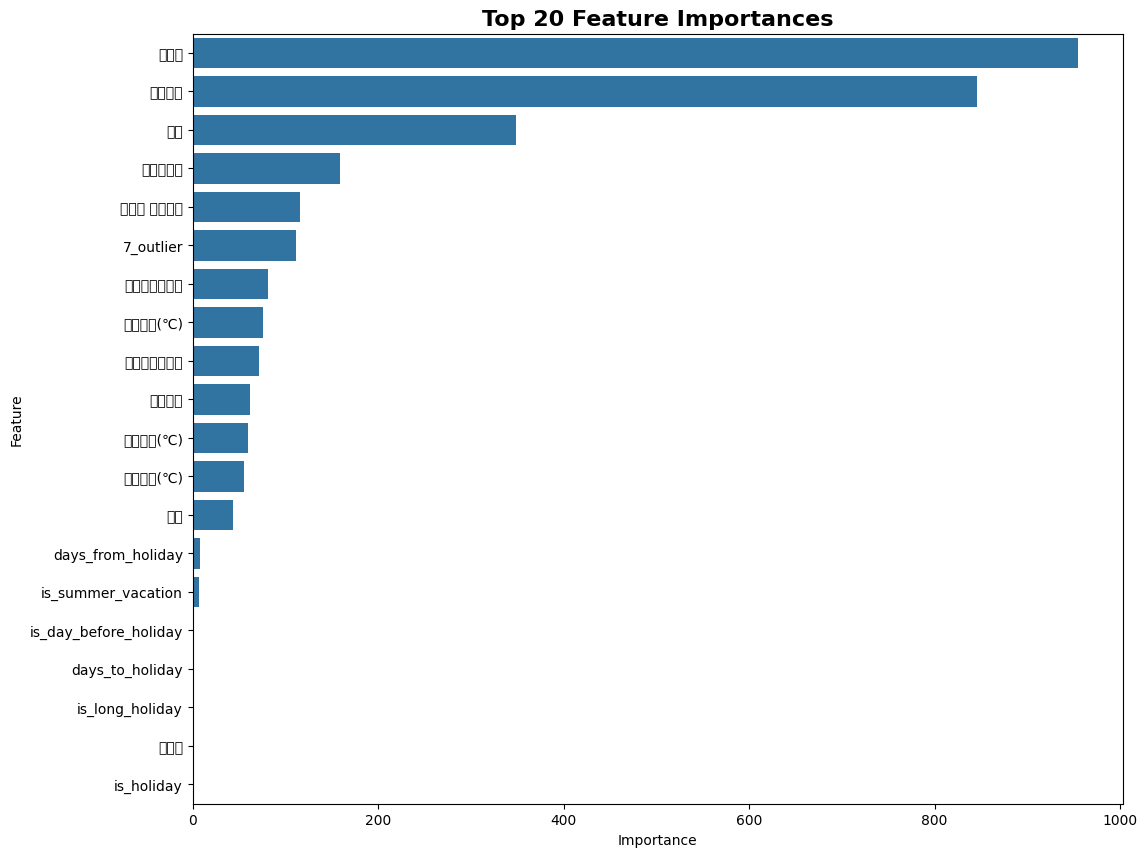


--- 상위 20개 변수 중요도 ---


,Feature,Importance
3,바코드,955
6,공급가액,846
2,입수,349
0,매출처코드,159
1,매출처 우편번호,116
22,7_outlier,111
29,소비자심리지수,81
25,최저기온(℃),76
28,소비자물가지수,71
27,국제유가,62


In [ ]:
# 1. ✨️ feature_importances_ 속성으로 변수 중요도 추출
importances = model.feature_importances_

# 2. 변수 이름과 중요도를 짝지어 데이터프레임 생성
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': importances}
)

# 3. 중요도 순으로 정렬하고 상위 20개 선택
top_20_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# 4. 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=top_20_features)
plt.title('Top 20 Feature Importances', fontsize=16, fontweight='bold')
plt.show()

print("\n--- 상위 20개 변수 중요도 ---")
display(top_20_features)

### 끝